# Seeing movie industry through IMDB
Based on the information provided to us by IMDB, we would like to use the movie table to explore the change of movies in terms of quantity and quality in the last 100 years. The genre table is used to explore the changes in film genres, and the connection between film genres and film quality. After focusing on the films themselves, we would like to explore the relationship between the creative style (independent or co-director) and the quality of the films from the perspective of the film director. We then want to see if the gender of the director has an effect on the quality of the films they direct. We also want to look at the extent of women's participation in the film industry in the last century by looking at the gender information contained in the actor table. We want to explore the development of the film industry in the last century from the perspective of the above questions, and the context of the times and social issues indirectly reflected behind the development.

In [66]:
import mysql.connector
import pandas as pd
import gender_guesser.detector
import numpy as np

import matplotlib.pyplot as plt

In [44]:
import mysql.connector
import pandas as pd

our_username = "root"
our_password = ""
our_host = "localhost" 

conn = mysql.connector.connect(host=our_host, username=our_username, password=our_password)

db_cursor = conn.cursor(buffered=True)

In [45]:
database_name = "imdb"

query = f"CREATE DATABASE IF NOT EXISTS {database_name}"

result = db_cursor.execute(query)

query_select_database = f"USE {database_name}"

result = db_cursor.execute(query_select_database)

## How movie quantity changed over years 
Faced with the database and the developments in the movie industry we wanted to understand, we chose to start with the number of movies, and in this section, we wanted to observe the year-on-year trends in the number of movies, as shown in the chart. 

 

Due to the untimely maintenance of the database from 2000 onwards, much of the data in the database from too early (late 19th century) and too late (early 21st century) is missing, for example only one Harry Potter was loaded into the IMDB in 2008, so we turned our attention to the one hundred years of last century. 

In [46]:
#Select the number of movie year of 20th century group by year
#Contains aggregation function

query1='''
SELECT year,COUNT(id) as movie_number
FROM movies
WHERE year>=1900 and year<=1999
GROUP BY year
'''

pd.read_sql(query1, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,movie_number
0,1900,759
1,1901,837
2,1902,788
3,1903,831
4,1904,176
...,...,...
95,1995,7919
96,1996,8362
97,1997,9023
98,1998,10067


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<Figure size 432x288 with 0 Axes>

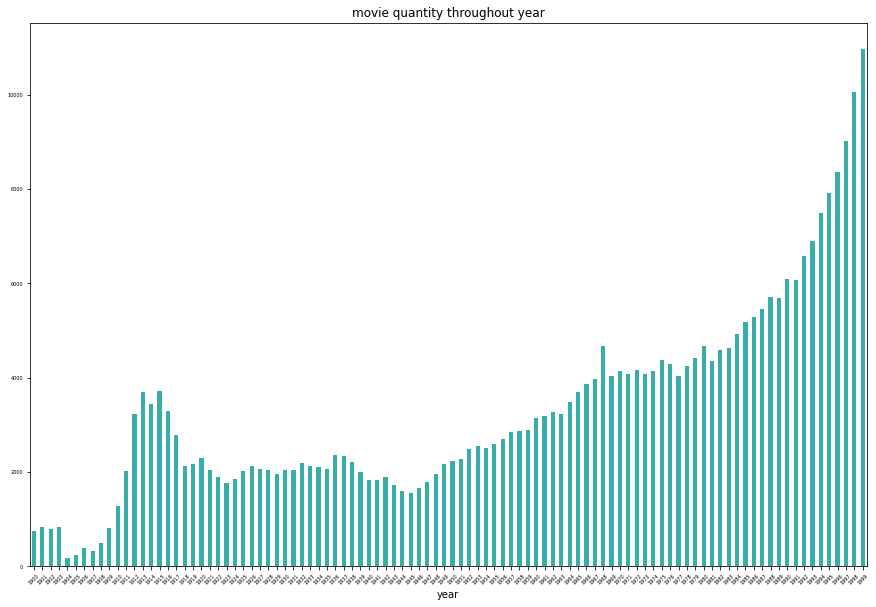

In [47]:
df1=pd.read_sql(query1, conn)
df1=df1.set_index('year')

plt.figure()
ax1 = df1[['movie_number']].plot(
    kind='bar',
    title ="movie quantity throughout year",
    figsize=(15, 10),
    legend=False,
    color='#38ada9',
    fontsize=5)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.show()
# ax1.figure.savefig('movie_quantity.png')

The bar chart shows that the overall trend in the number of movies is increasing year on year, which means that the movie industry is moving in a positive direction (or there would not be more and more movies being made).  

 

There are some particular points in this, for example we find a steep increase in the number of movies between 1910 and 1920, and indeed the 1910s is an interesting period in the history of cinema. Feature movies became the norm, Hollywood began to dominate the market, and the World War I led to a radical change in the world of cinema. We also note a particular year, 1968, in which the number of movies seems to have changed somewhat unusually, and a survey of the world cinema industry in 1968 shows that 1968 was hailed as the most radical year in cinema, and Hollywood reflected this vividly with a series of landmark movies, featuring a variety of respected directors and performers, including Stanley Kubrick Stanley Kubrick released his masterpiece 2001: A Space Odyssey in 1968, and the world got to see George A. Romero's Night of the Living Dead thriller up close and personal, to name but a few. These are the movies that will change cinemas forever.  

   

And by integrank them with historical facts, the overall climate of the world changed dramatically that year. The tragic assassination of revolutionary thinker and prominent civil rights activist Martin Luther King Jr. sparked national riots and civil unrest (as reflected in the year's documentary Black Panther). Protests against Vietnam were rampant in the US, as were international student protests in France, challenging capitalism, US imperialism and many other grievances. For the only time in its history, the prestigious Cannes Movie Festival was notoriously closed due to the French demonstrations. The famous and politically controversial documentary, released in the year of the pigs by director Emile de Antonio, depicted the US involvement in the Vietnam War. The movie was later described as "the first and best major documentary on Vietnam". This period in Tinsel Town was truly revolutionary for cinema, and a time of pop culture boom and innovation. From the horrific rampage of the living dead, to sinister cults and even an Adolf Hitler musical, 1968 was certainly a radical year for Hollywood cinema. 

## How movie genre changed over years  
After roughly observing the changes in the number of movies, we want to dig deeper in details, such as the genre of movies. In the next query, we investigate the change of the number of movie genre, and we got this bar chart. 

In [48]:
# Select the number of different movie genres throughout 20th century
# Contains aggregation function
query2='''
SELECT m.year, mg.genre, COUNT(mg.genre) AS Genre_Count
FROM movies m
JOIN movies_genres mg
ON m.id=mg.movie_id
WHERE year>=1900 and year<=1999
GROUP BY year,genre

'''
pd.read_sql(query2, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,genre,Genre_Count
0,1900,Action,2
1,1900,Adventure,1
2,1900,Animation,1
3,1900,Comedy,80
4,1900,Crime,6
...,...,...,...
1905,1999,Sci-Fi,170
1906,1999,Short,2230
1907,1999,Thriller,445
1908,1999,War,62


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


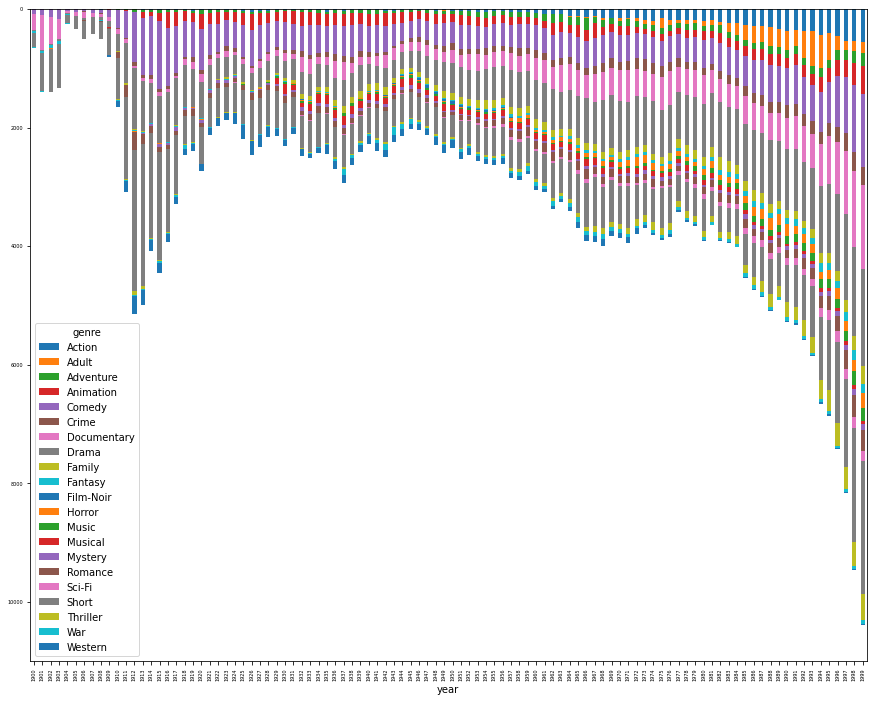

In [49]:
df2=pd.read_sql(query2, conn)
df2_plot = df2[['year','genre','Genre_Count']]

df2_plot = df2_plot.pivot(
    index='year',
    columns='genre',
    values='Genre_Count'
)

ax2 = df2_plot.plot(kind='bar',stacked=True,figsize=(15,12),fontsize=5)
ax2.set_ylim(11000,0)
plt.show()
# ax2.figure.savefig('movie_genre_100years.pdf')

A year-by-year analysis of the number of movie genres reveals that most changes cannot be separated from a number of key time periods.  

  

The decade of the 1930s （and much of the 1940s） is nostalgically referred to as the 'Golden Age of Hollywood' (although most of the decade's output was in black and white). the 1930s was also the decade of the sound and colour revolution, the development of the 'talkies', and the The 1930s was also the decade of the sound and colour revolution, the development of the 'talkies' and the further development of movie genres (gangster movies, musicals, newspaper reports, historical biopics, social realism, light-hearted comedies), Westerns and horror movies, etc.). This was the end of the silent era, and many silent movie stars did not make the transition to talkies (for example, Vermeer Banki, John Gilbert and Norma Talmage). By 1933, the economic effects of the Great Depression were being felt strongly, particularly the decline in cinema attendance.   

  

The impact of the spread of television on the movie industry in the 1950s, and "War years and post-World War II trends: the decline of the Hollywood studios"   

The 1960s saw social and demographic changes. Movies focused on entertainment, fashion, rock 'n' roll and rebellion.  

  

The movies reflect a decade of fun, fashion, rock and roll, great social change （i.e. the civil rights era and marches） and transitional cultural values. It was a tumultuous decade full of great change, tragedy, cultural events, assassinations and deaths, and progress. 

 

We show trends in the number of movies in each genre by making them more visible, for example, we have highlighted the section of Film noir in the bar table

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


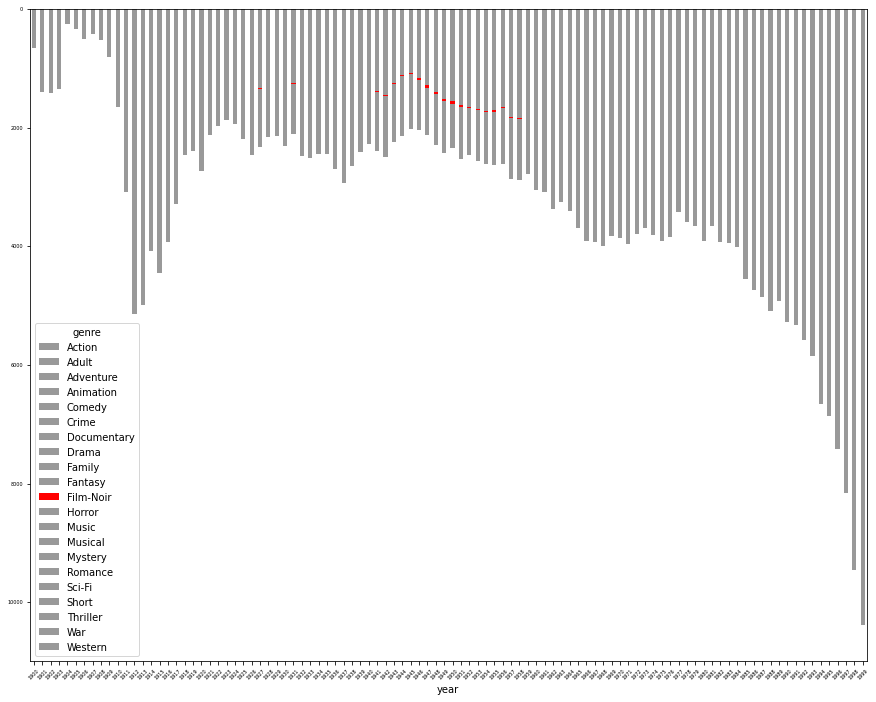

In [50]:
df2_filmnoir=pd.read_sql(query2, conn)
df2_plot = df2[['year','genre','Genre_Count']]
custom_color = ['#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','red','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999']

df2_plot = df2_plot.pivot(
    index='year',
    columns='genre',
    values='Genre_Count'
)

ax2 = df2_plot.plot(kind='bar',stacked=True,figsize=(15,12),fontsize=5,color=custom_color)
ax2.set_ylim(11000,0)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.show()
ax2.figure.savefig('filmnoir.pdf')

It can be seen that Film Noir (the red part) existed in very small numbers between 1930 and 1960. 

 

Sanity-check: In case this seemingly somewhat unusual result is due to data incompleteness in the database itself, we examined this movie genre and found that this is indeed the case: Movie noir is a cinematic term used primarily to describe stylish Hollywood crime dramas, particularly those that emphasize cynical attitudes and motivations. The 1940s and 1950s are generally regarded as the "classic period" of American movie noir. Movie noir of this era is associated with a low-key, black-and-white visual style that has roots in German Expressionist cinematography. Many of the prototypical stories and much of the attitude of classic noir derive from the hardboiled school of crime fiction that emerged in the United States during the Great Depression.  

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


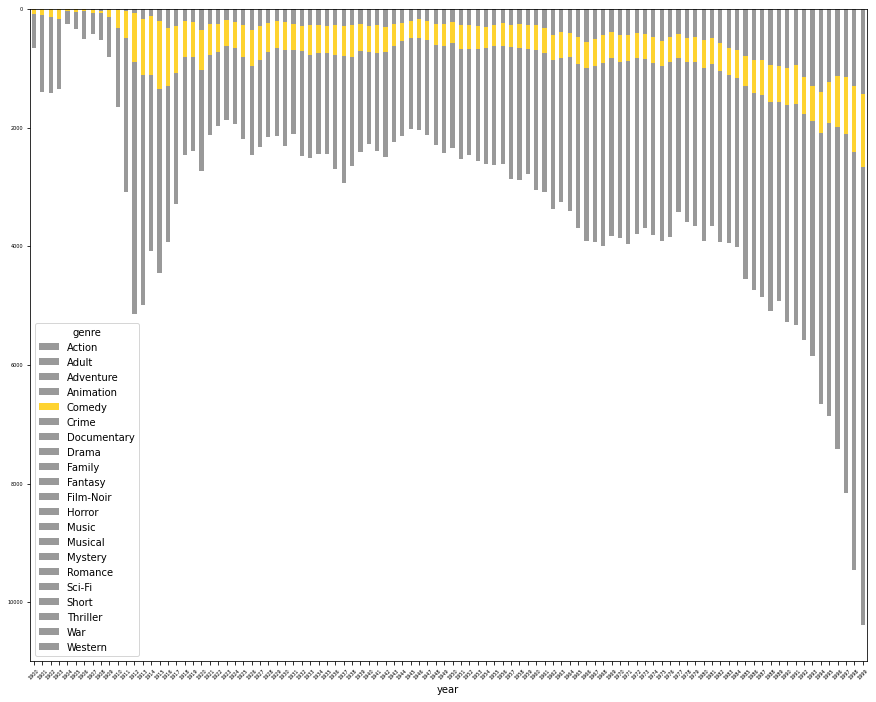

In [51]:
df2=pd.read_sql(query2, conn)
df2_plot = df2[['year','genre','Genre_Count']]
custom_color = ['#999999','#999999','#999999','#999999','#fed330','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999']

df2_plot = df2_plot.pivot(
    index='year',
    columns='genre',
    values='Genre_Count'
)

ax2 = df2_plot.plot(kind='bar',stacked=True,figsize=(15,12),fontsize=5,color=custom_color)
ax2.set_ylim(11000,0)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.show()
# ax2.figure.savefig('comedy.pdf')

Comedy was released early, but did not gain much momentum in the early years of the 20th century until 1910, the year it exploded, and has remained a popular genre in terms of the number of comedies released each year since. 

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


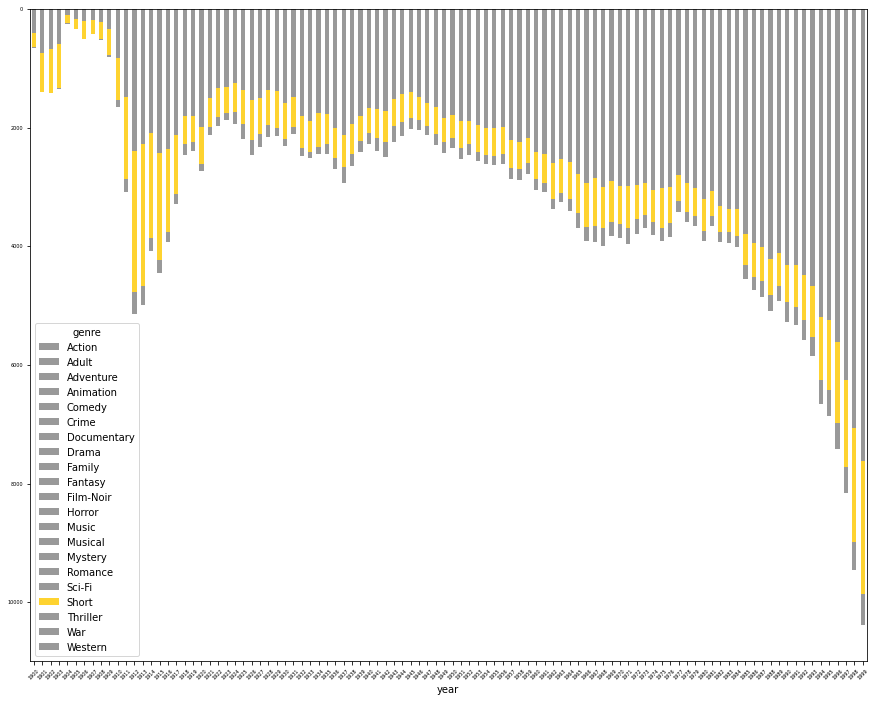

In [52]:
df2=pd.read_sql(query2, conn)
df2_plot = df2[['year','genre','Genre_Count']]
custom_color = ['#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#999999','#fed330','#999999','#999999','#999999']

df2_plot = df2_plot.pivot(
    index='year',
    columns='genre',
    values='Genre_Count'
)

ax2 = df2_plot.plot(kind='bar',stacked=True,figsize=(15,12),fontsize=5,color=custom_color)
ax2.set_ylim(11000,0)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.show()
# ax2.figure.savefig('shorts.pdf')

The highlighted part shows that short movies have always played an important role in the movie industry, especially before 1910, the number of short movies accounted for more than half of the movie market, and the subsequent decline cannot be ignored.

## How movie quality(rank) changed over years  
Through the previous year-by-year analysis of the number of movies and the changes in the number of movies in different genres, it is clear that we can find some key years and stages in the graphs obtained from the visualization, and now we focus our question on the analysis of the trends in the average movie rank in the database in different movie genres, in an attempt to observe the changes in the quality of the movies. 

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


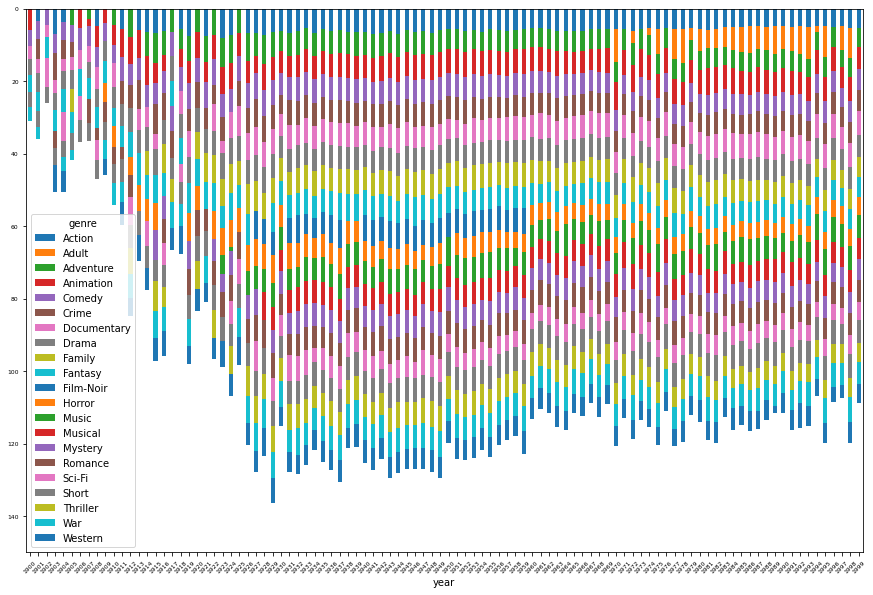

In [53]:
# Select the average ranking of different movie genres throughout 20th century
# Contains aggregation function

query3='''
SELECT m.year, mg.genre, AVG(m.rank) AS avg_rank
FROM movies m
JOIN movies_genres mg
ON m.id=mg.movie_id
WHERE year>=1900 and year<=1999
GROUP BY year,genre

'''
pd.read_sql(query3, conn)

df3=pd.read_sql(query3, conn)
df3_plot = df3[['year','genre','avg_rank']]
df3_plot = df3_plot.pivot(
    index='year',
    columns='genre',
    values='avg_rank'
)
ax3 = df3_plot.plot(kind='bar',stacked=True,figsize=(15,10),fontsize=6)
# ax7.legend(bbox_to_anchor=(1.2, 1))
ax3.set_ylim(150,0)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
plt.show()
ax3.figure.savefig('movie_ranking_100years.pdf')

Sanity check: We found more drastic changes in movie average scores in the first half of the 20th century, but this is in fact due to the fact that many movie genres did not exist at this stage. The changes in trends in this period are less available for reference, so here we have chosen the second half of the 20th century to observe the trends in movie quality: 

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


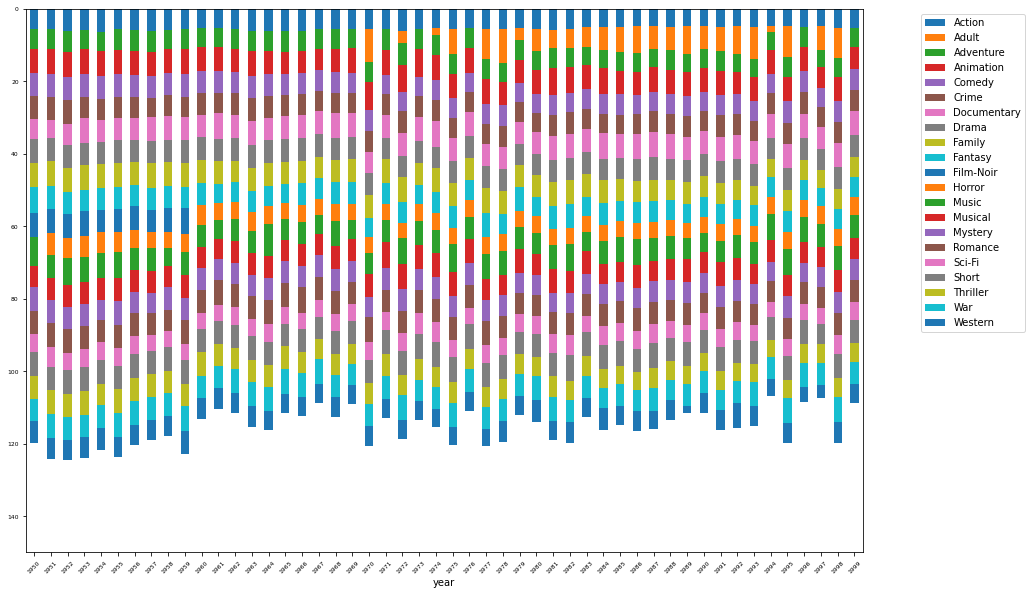

In [67]:
# Select the average ranking of different movie genres throughout second half of 20th century
# Contains aggregation function

query3='''
SELECT m.year, mg.genre, AVG(m.rank) AS avg_rank
FROM movies m
JOIN movies_genres mg
ON m.id=mg.movie_id
WHERE year>=1950 and year<=1999
GROUP BY year,genre

'''
pd.read_sql(query3, conn)

df3=pd.read_sql(query3, conn)
df3_plot = df3[['year','genre','avg_rank']]
df3_plot = df3_plot.pivot(
    index='year',
    columns='genre',
    values='avg_rank'
)
ax3 = df3_plot.plot(kind='bar',stacked=True,figsize=(15,10),fontsize=6)
ax3.legend(bbox_to_anchor=(1.2, 1))
ax3.set_ylim(150,0)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
plt.show()
ax3.figure.savefig('movie_ranking_50years.pdf')

Based on the trend of changes in the past 50 years, The overall rank of movie has not changed significantly (except for the disappearance of the Movie-Noir genre and the emergence of the adult genre). 

## What movie genre are more likely to get higher score?  
So which genre do top ranking movies mainly belong to? By investigating the distribution of movie genre with ranks over 9.5 in the database, we got the following query:

In [55]:
#Find the information about top ranking movies (rank>=9.5)
query4='''
SELECT m.year, m.name,m.rank, mg.genre 
FROM movies m
JOIN movies_genres mg
ON m.id=mg.movie_id
WHERE rank IS NOT NULL and rank>=9.5
ORDER BY rank DESC
'''
pd.read_sql(query4,conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,name,rank,genre
0,1985,Young and Restless 2,9.9,Adult
1,1934,Napolon Bonaparte,9.9,Drama
2,1944,Svadba,9.9,Comedy
3,1971,Atunci i-am condamnat pe toti la moarte,9.9,War
4,1953,"Unicorn in the Garden, A",9.9,Short
...,...,...,...,...
514,2004,Descent,9.5,Thriller
515,1969,Khamoshi,9.5,Romance
516,1980,Saptapadhi,9.5,Drama
517,1997,Boy,9.5,Thriller


In [56]:
# Find genres information among the top ranking  movies(rank>=9.5)

query5='''
SELECT mg.genre, COUNT(mg.genre) AS genre_count
FROM movies m
JOIN movies_genres mg
ON m.id=mg.movie_id
WHERE m.rank IS NOT NULL and m.rank>=9.5
GROUP BY mg.genre
ORDER BY genre_count DESC
'''
pd.read_sql(query5, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,genre,genre_count
0,Short,111
1,Drama,102
2,Comedy,71
3,Documentary,50
4,Animation,33
5,Family,23
6,Musical,16
7,Thriller,16
8,Action,14
9,Romance,13


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<Figure size 432x288 with 0 Axes>

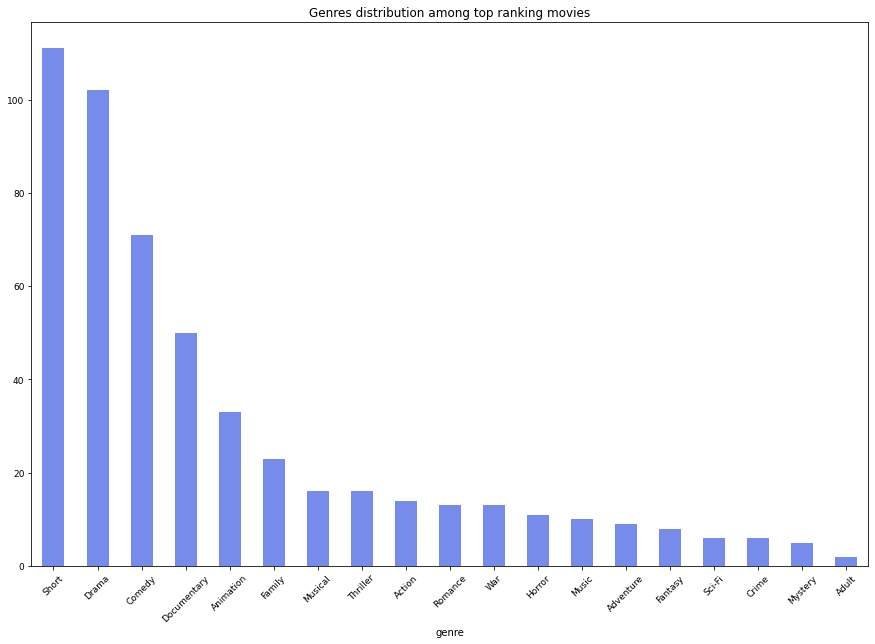

In [58]:
df5=pd.read_sql(query5, conn)
df5=df5.set_index('genre')
plt.figure()

ax5 = df5[['genre_count']].plot(
    kind='bar',
    title ="Genres distribution among top ranking movies",
    figsize=(15, 10),
#     ylim=(2, 9),
    legend=False,
    color='#778beb',
    fontsize=9)
for tick in ax5.get_xticklabels():
    tick.set_rotation(45)
plt.show()
# ax6.figure.savefig('top_ranking_genre.pdf')

Here we can see that shorts, drama and comedy are more likely to obtain higher ranking.  

 

Sanity-check: Due to the lack of some movie rankings in the IMDB, the results obtained by the query cannot 100% accurately show the most authentic movie genres that are likely to be rated as high-quality. 

## Are movies directed by multiple directors more likely to get higher ranks?  
Then, we are interested in the directors who directed these high-quality movies. As we observed in the database, a movie may have one or more directors. So we want to ask: Are movies directed by multiple directors more likely to get higher ranks? (Since, the ideas of multiple people can be complement each other, and enriching the content of the movies.) Then we classified the top ranking movies that have a single director or multiple ones, and got the following visualization results:

In [72]:
# Find out the number of the top ranking movies(rank>=9.5) that has more than one director
query7 = """
SELECT COUNT(*)
FROM movies m
JOIN movies_directors md
ON md.movie_id = m.id
WHERE EXISTS(
    SELECT * 
    FROM movies_directors 
    WHERE md.director_id <> movies_directors.director_id
    AND movies_directors.movie_id = md.movie_id
)
AND m.rank IS NOT NULL and m.rank>=9.5

"""
df7=pd.read_sql(query7, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [73]:
# Find out the total number of the top ranking movies(rank>=9.5)
query8 = """
SELECT COUNT(*)
FROM movies m
WHERE m.rank IS NOT NULL and m.rank>=9.5
"""
df8=pd.read_sql(query8, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


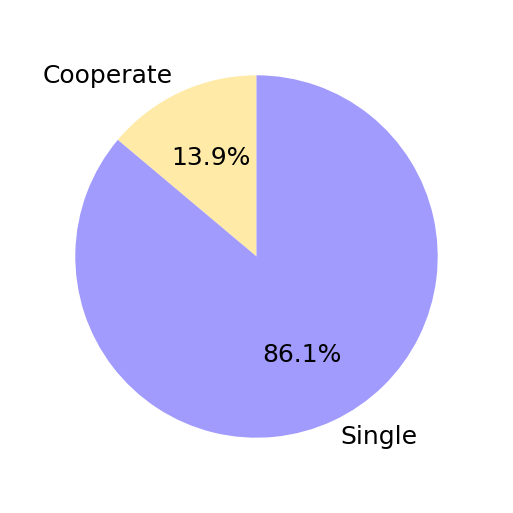

In [74]:
# Find out the porportion of multiple director and single director
category_names=['Cooperate','Single']
sizes=[df7['COUNT(*)'][0],df8['COUNT(*)'][0]-df7['COUNT(*)'][0]]
plt.figure(figsize=(2,2),dpi=300)
custom_colors=['#ffeaa7','#a29bfe']
plt.pie(sizes,labels=category_names,textprops={'fontsize':6},startangle=90,colors=custom_colors,autopct='%1.1f%%')
plt.show()

Contrary to what we have thought before, we found that among top ranking movies, directors tend to direct alone rather than cooperate with others. 

 

At this moment, we'd like to offer some suggestions to the movie directors: 
If you want to make a movie with high ranks, you may choose direct on your own and try more movie genres like short, drama, comedy:) 

## Were male or female directors more likely to direct a top-ranking movie?  
At the same time, we noticed that gender information was not given in the directors' table, but we'd like to know the gender distribution of the directors who directed these top ranking movies, so we applied the gender guesser detector that we learned in the exercise class to predict the gender of the directors by their names, and counted their proportion, and compared the gender proportion of all directors of movies in the last century.

In [62]:
# Find out all directors who cooperated with others to create top ranking movies
# Contains DISTINCT that changed the result (49 results instead of 53)
# Contains nested query

query6 = """
SELECT DISTINCT first_name,last_name
FROM movies_directors md
JOIN directors d
ON md.director_id = d.id
JOIN movies m
ON md.movie_id=m.id

AND m.rank IS NOT NULL and m.rank>=9.5

"""
pd.read_sql(query6, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,first_name,last_name
0,Ivan,Aksenchuk
1,Andy (I),Anderson
2,Isidor,Annensky
3,Cüneyt,Arkin
4,Ismet,Arnautalic
...,...,...
346,Fred,Zeytoonjian
347,Andrew,Zilch
348,Justin Choma,Zimmerman
349,Aida,Zyablikova


In [64]:
!pip install gender-guesser

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


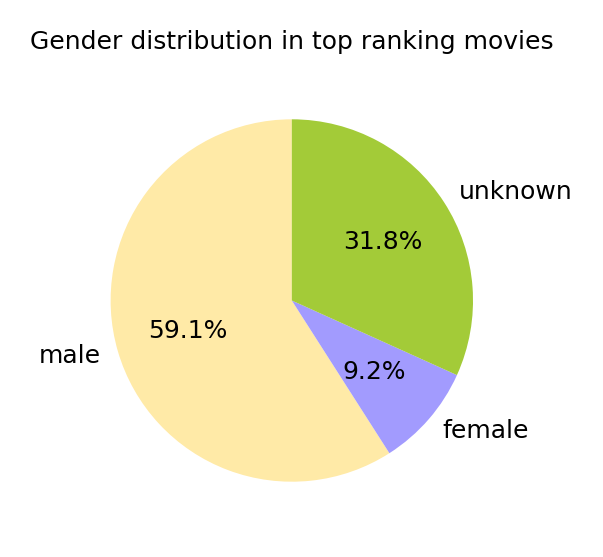

In [68]:
df6 = pd.read_sql(query6, conn)
gender = []
gender_detector= gender_guesser.detector.Detector()
for firstname in df6['first_name']:
    guess = gender_detector.get_gender(firstname)
    gender.append(guess)
df6['gender']=gender
sum_male=sum(df6['gender']=='male')
sum_female=sum(df6['gender']=='female')
sum_unknown=sum(df6['gender']=='unknown')
category_names=['male','female','unknown']
sizes=[sum_male,sum_female,sum_unknown]
plt.figure(figsize=(2,2),dpi=300)
custom_colors=['#ffeaa7','#a29bfe','#A3CB38']
plt.pie(sizes,labels=category_names,textprops={'fontsize':6},startangle=90,colors=custom_colors,autopct='%1.1f%%')
plt.title("Gender distribution in top ranking movies",fontsize=6) 
plt.show()

In [69]:
#Find gender of all movie directors
query11 = """
SELECT DISTINCT first_name,last_name
FROM directors
"""
pd.read_sql(query11, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,first_name,last_name
0,A.,Aleksandrov
1,A.,Babes
2,A.,Balakrishnan
3,A.,Barr-Smith
4,A.,Berry
...,...,...
86839,Zygmunt,Lech
86840,Zygmunt,Malanowicz
86841,Zygmunt,Skonieczny
86842,Zygmunt,Solarz


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


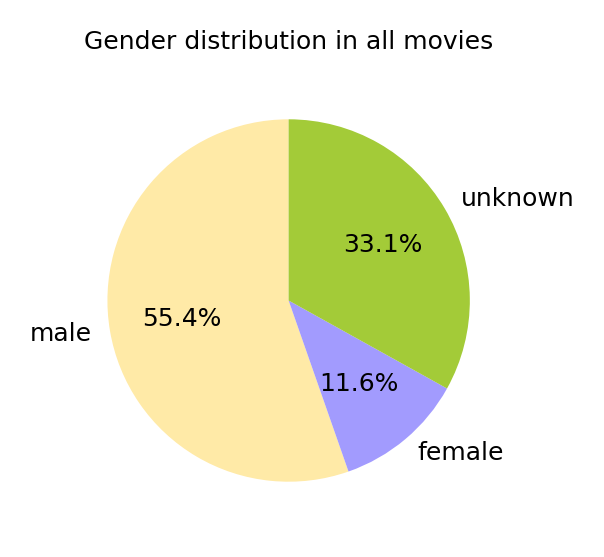

In [70]:
df11 = pd.read_sql(query11, conn)
gender = []
gender_detector= gender_guesser.detector.Detector()
for firstname in df11['first_name']:
    guess = gender_detector.get_gender(firstname)
    gender.append(guess)
df11['gender']=gender
sum_male=sum(df11['gender']=='male')
sum_female=sum(df11['gender']=='female')
sum_unknown=sum(df11['gender']=='unknown')
category_names=['male','female','unknown']
sizes=[sum_male,sum_female,sum_unknown]
plt.figure(figsize=(2,2),dpi=300)
custom_colors=['#ffeaa7','#a29bfe','#A3CB38']
plt.pie(sizes,labels=category_names,textprops={'fontsize':6},startangle=90,colors=custom_colors,autopct='%1.1f%%')
plt.title("Gender distribution in all movies",fontsize=6) 
plt.show()

As can be seen, compared to the gender distribution among directors as a whole, the proportion of male directors increases and the proportion of female directors decreases in TOP ranking movies, suggesting that male directors were more likely to make highly ranked movies in the 20th century. However, some of the names in the data cannot be identified by gender, leading to our conclusion not being 100% correct, which is one of the current limitations of the database. 

## How the ratio of actor and actress changed over years? 
After looking at the distribution of the director's gender, we would like to continue to explore how the distribution of gender among actors, especially the trend of this distribution over time.

In [75]:
# Select the number of female actors and male actors throughout 20th century
# Contains aggregation function
# Contains "case when" element of SQL that was not covered in class
query9='''

SELECT m.year,COUNT(case when  a.gender='M'
                   then 1 end )  AS male, COUNT(case when  a.gender='F'
                   then 1 end ) AS female
FROM actors a
JOIN roles r
ON a.id=r.actor_id
JOIN movies m
ON m.id=r.movie_id
WHERE year>=1900 and year<=1999
GROUP BY year

'''
pd.read_sql(query9, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,male,female
0,1900,76,18
1,1901,117,40
2,1902,102,33
3,1903,63,22
4,1904,21,3
...,...,...,...
95,1995,50232,27721
96,1996,53237,29740
97,1997,58126,32077
98,1998,61794,34044


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


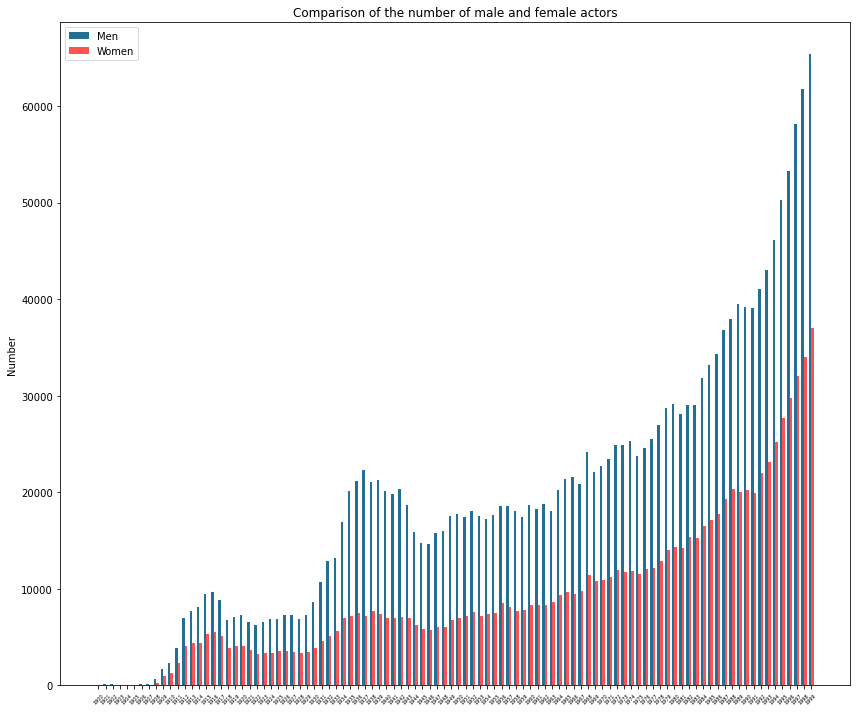

In [76]:
df9=pd.read_sql(query9, conn)
df9=df9.set_index('year')

labels = df9.index
men = df9['male']
women = df9['female']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax9 = plt.subplots(figsize = (12, 10))
rects1 = ax9.bar(x - width/2, men, width, label='Men',color='#227093')
rects2 = ax9.bar(x + width/2, women, width, label='Women',color='#ff5252')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax9.set_ylabel('Number')
ax9.set_title('Comparison of the number of male and female actors')
ax9.set_xticks(x,labels)
ax9.legend()

plt.xticks(fontsize=5, rotation=90)
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

for tick in ax9.get_xticklabels():
    tick.set_rotation(45)

fig.tight_layout()

plt.show()
ax9.figure.savefig('gender.pdf')

And then we tried to show the change in the percentage of the number of male and female actors in the form of percentage: 

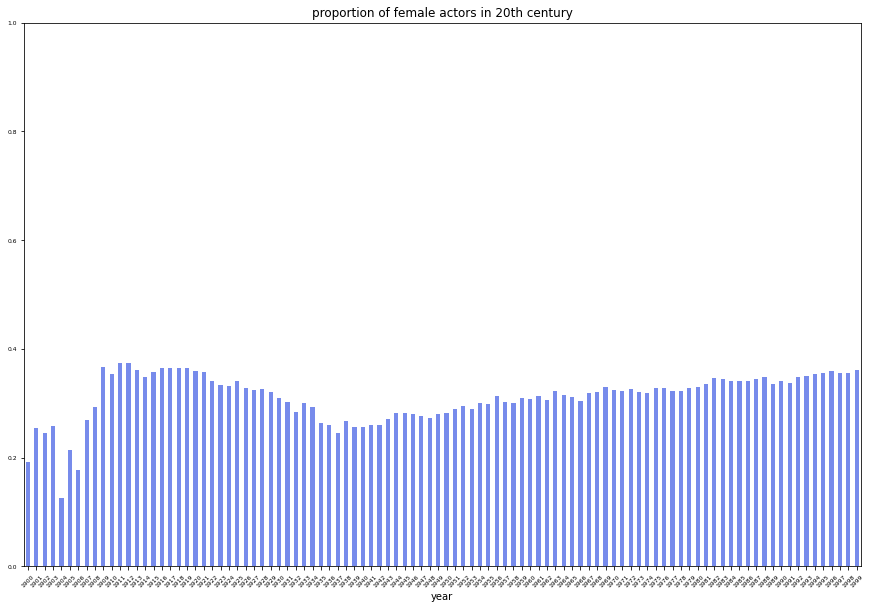

In [77]:
df9['female_percentage']=df9['female']/(df9['female']+df9['male'])
ax9_1 = df9['female_percentage'].plot(
    kind='bar',
    title ="proportion of female actors in 20th century",
    figsize=(15, 10),
    ylim=(0, 1),
    legend=False,
    color='#778beb',
    fontsize=6)
for tick in ax9_1.get_xticklabels():
    tick.set_rotation(45)
plt.show()

The visualization of the number of male and female actors shows that men continued to outnumber women, even twice in number, we can say that "the movie industry is a world whose 2/3 belongs to men". From around 1940, the proportion of female actors slowly rose. (But unfortunately the database does not contain data for the last 20 years, so we can not determine the development of the trend after that.) 

 

After a direct comparison of the number of male and female actors, we would like to take note of the year-by-year change in the percentage of movies with more female actors than male actors, in order to indirectly observe the change in the participation of women in the movie industry in the 20th century. 

## How does the proportion of movies with a dominant number of female actors in all movies change over time?  

In [85]:
# Find the number of movie that have more female acotors than male actors
# Contains nested query
# Contains "case when" element that was not covered in class
# Contains an aggregation function with HAVING

query10='''
WITH female_more_than_male (name, year)
AS (    
    SELECT name,year
    FROM movies
    WHERE id IN
        (
            SELECT r.movie_id
            FROM roles r
            JOIN actors a
            ON r.actor_id = a.id
            GROUP BY r.movie_id
            HAVING SUM(case when a.gender = 'F' then 1 else 0 end) > SUM(case when a.gender = 'M' then 1 else 0 end)
        )
)

SELECT year, COUNT(*)
FROM female_more_than_male
WHERE year>=1900 and year<=1999
GROUP BY year
'''
pd.read_sql(query10, conn)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,COUNT(*)
0,1900,11
1,1901,10
2,1902,10
3,1903,17
4,1904,1
...,...,...
95,1995,1480
96,1996,1460
97,1997,1589
98,1998,1689


In [86]:
df10=pd.read_sql(query10, conn)
df10=df10.set_index('year')
df10

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,COUNT(*)
year,
1900,11
1901,10
1902,10
1903,17
1904,1
...,...
1995,1480
1996,1460
1997,1589


In [87]:
df_join =df1.join(df10, on='year', how='left')

In [88]:
df_join['percentage']=df_join['COUNT(*)']/df_join['movie_number']

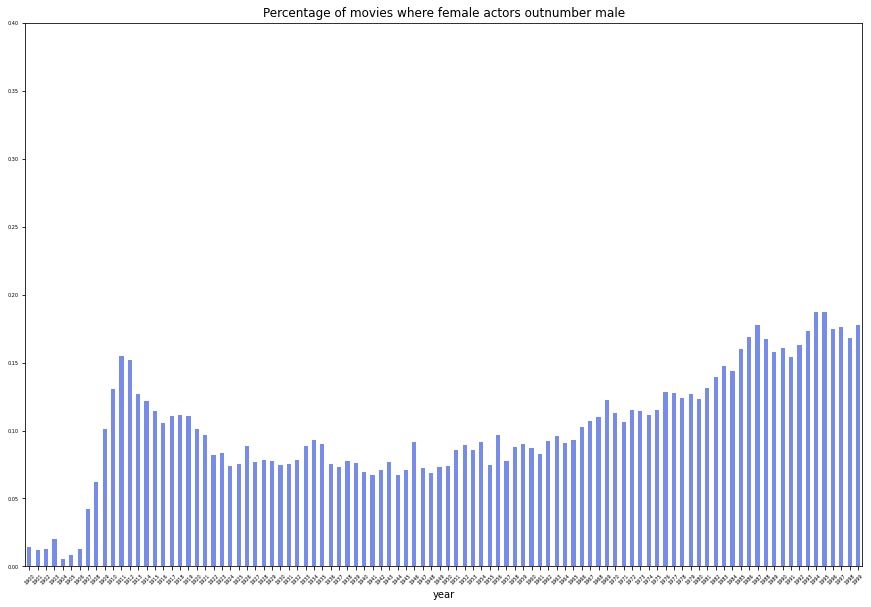

In [89]:
plt.figure()

ax10 = df_join['percentage'].plot(
    kind='bar',
    title ="Percentage of movies where female actors outnumber male",
    figsize=(15, 10),
    ylim=(0, 0.4),
    legend=False,
    color='#778beb',
    fontsize=5)
for tick in ax10.get_xticklabels():
    tick.set_rotation(45)
plt.show()
# ax10.figure.savefig('100year_genderpercentage.pdf')

We found that, overall, up to 85% of the movies had more male actors than female actors. The resulting graphs form the “U-shape” pattern. Before 1910, the movie industry was fueled by independent moviemakers, and women participation was steadily increasing. Roles for women increased from 1910 to 1920 and then sharply dropped. By 1930, the proportion of movies dominated by female actors had almost halved. female representation in the movie industry hit an all-time low during the so-called Golden Age. Until 1950, it started increasing steadily. 

## Limitation of the database： 

A lot of data is missing in the database from early (late 19th century) and recent years (early 21st century), for example, only one Harry Potter was loaded into IMDB in 2008. 

In the movie table, the rank data of some movies are missing, which makes it hard to find the change of the rank of each movie genre completely accurately. 

In the director's table, there is a lack of gender data, age data, etc., so that in the statistics of director's gender ratio, we have to face some unknown gender data. 

 

The absence of ethnicity and age data in the actor section reduce some possibilities of the story telling. 

## Conclusion 

Through the previous year-by-year analysis of the number of movies, different genres of movies, and changes in movie raking, we can obviously find some key years and stages in the graphs obtained from the visualization, which are not only milestones in the movie industry, but also reflect important historical points in the social context of the time, making us feel that the development of the movie industry is a living history. In addition, we also conducted gender analysis of directors and actors, and the results also helped us to get a glimpse of the social life of people in the last century from the perspective of gender study. We used technology to take a macro view of the changes in the film industry over the past 100 years, and it was amazing to see how the visualizations were made and analyzed to match the history. We would like to consider this "story-telling" experience as a good practice in the field of Digital Humanities. 